<a href="https://colab.research.google.com/github/LeaderTrusty/Eniac-Company/blob/main/questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration and cleaning; business questions
1. How should products be classified into different categories to simplify reports and analysis?
2. What is the distribution of product prices across different categories?
3. How many products are being discounted?
4. How big are the offered discounts as a percentage of the product prices?
5. How do seasonality and special dates (Christmas, Black Friday) affect sales?
6. How could data collection be improved?
7. How many orders are there?
8. How many products are there?
9. What period of time do these orders comprise?
10. How many orders are Completed?
11. How should revenue be computed?

In [ ]:
# import modules

# remove FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# import pandas
import pandas as pd

# import regex module
import re

# import matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# options
pd.options.display.max_colwidth = 100

In [ ]:
# Import Data

import pandas as pd

url = 'https://drive.google.com/file/d/1R2K64BRR3hfkMIaHpVnzIylANyDJp6eX/view?usp=sharing' # products.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

url = 'https://drive.google.com/file/d/19Mns-182ebklQKYDkQzqn5X0zccECHFP/view?usp=sharing' # orders.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

url = 'https://drive.google.com/file/d/19kcLNTd04qLk067FmiDpDLzcQ6Wro-3e/view?usp=sharing' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1e8Bzb1prPA1b8Py5ZJyb30V3uYZxb8xL/view?usp=sharing' # brands.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)


In [ ]:
# import data

#brands     = pd.read_csv('cleaned_data/brands_clean.csv')
#orders     = pd.read_csv('cleaned_data/orders_clean.csv', parse_dates=['created_date'])
#orderlines = pd.read_csv('cleaned_data/orderlines_clean.csv', parse_dates=['date'])
#products   = pd.read_csv('cleaned_data/products_clean.csv')




# loc state to **Completed** and exclude unwanted orders in both **orders** and **orderlines**

In [ ]:
orders =orders.loc[orders['state'] == 'Completed']

In [ ]:
ord_ordlin_merged = orders.merge(
                          orderlines,
                          how='inner',
                          on='order_id'
                      )
ord_ordlin_merged

,Unnamed: 0_x,order_id,created_date,total_paid,state,Unnamed: 0_y,id,product_quantity,sku,unit_price,date
0,1,241423,2017-11-06 13:10:02,136.15,Completed,142509,1398738,1,LAC0212,129.16,2017-11-06 12:47:20
1,2,242832,2017-12-31 17:40:03,15.76,Completed,219383,1529178,1,PAR0074,10.77,2017-12-31 17:26:40
2,3,243330,2017-02-16 10:59:38,84.98,Completed,28729,1181923,1,OWC0074,77.99,2017-02-15 17:07:44
3,5,245275,2017-06-28 11:35:37,149.00,Completed,81676,1276706,1,TAD0007,149.00,2017-06-28 11:12:30
4,6,245595,2017-01-21 12:52:47,112.97,Completed,14997,1154394,2,PAC1561,52.99,2017-01-21 12:49:00
...,...,...,...,...,...,...,...,...,...,...,...
60415,226319,527042,2018-03-14 11:47:50,18.98,Completed,293586,1649446,1,APP0927,13.99,2018-03-14 11:42:38
60416,226347,527070,2018-03-14 11:50:48,24.97,Completed,293616,1649512,2,APP0698,9.99,2018-03-14 11:49:01
60417,226351,527074,2018-03-14 11:51:42,24.97,Completed,293621,1649522,2,APP0698,9.99,2018-03-14 11:49:36
60418,226373,527096,2018-03-14 11:58:40,34.96,Completed,293644,1649565,3,APP0698,9.99,2018-03-14 11:54:35


In [ ]:
orderlines = orderlines.loc[orderlines.order_id.isin(orders.order_id),:]

In [ ]:
orders = orders.loc[orders.order_id.isin(orderlines.order_id),:]

In [ ]:
# Checking orders with unknown products

non_order_id = orderlines.loc[~orderlines['sku'].isin(products['sku']),:]['order_id']
non_order_id

Series([], Name: order_id, dtype: int64)

# Questions

## 1. How should products be classified into different categories to simplify reports and analysis?


In [ ]:
# group by words in description (regex)
categories = {
    'Repair, Second hand and Services' : [1,999999, r'\bifixit\b|\blike/new\b|\breconditioned\b|\brefurbished\b|\brepair\b|\breplacement\b|\bscrewdriver\b|\bsecond hand\b|\bspatula\b|\bsphygmomanometer\b|\btoolkit\b|\btools\b'],
    'Accessories'                      : [1,2000, r'\badobe\b|\badapter\b|\bbank\b|\bbattery\b|\bbracket\b|\bbutton\b|\bcar\b|\bcharger\b|\bcharging\b|\bclock\b|\bdock\b|\bdvd\b|\bfan\b|\bhub\b|\bmicrosoft\b|\bpower\b|\bremote control\b|\bscale\b|\bsensor\b|\bsoftware\b|\bstand\b|\btablet\b|\bthermo*\b|\busb\b|\bwatch\b|\bweather\b'],
    'Alarms and Security'              : [1,300, r'\balarm\b|\blocator\b|\bradar\b|\bsecurity\b|\bsurveillance\b'],
    'Audio equipment'                  : [1,800, r'\bheadphones\b|\bheadset\b|\bmicrophone\b|\bmusic\b|\bplayer\b|\bspeaker\b'],
    'Lighting'                         : [1,600, r'\bbulb\b|\bhue\b|\blamp\b|\blights\b|\bphilips\b'],
    'Peripherals'                      : [1,10000, r'\bamplifier\b|\bcable\b|\bd-link\b|\bhdmi\b|\bkeyboard\b|\bkeypad\b|\bmonitor\b|\bmouse\b|\bpen\b|\bprinter\b|\brouter\b|\bscanner\b|\bscreen\b|\bstylus\b|\bswitch\b|\b802.11\b'],
    'Storage'                          : [1,13455, r'\bSSD\b|\bTB\b|\bGB\b|\bWD\b|\bwestern digital\b|\bdatatraveler\b|\bddr\b|\bdimm\b|\bexternal disk\b|\bflash drive\b|\bhard drive\b|\bdisk\b|\bthunderbolt\b|\bmemory card\b|\bnas\b|\bpen drive\b|\bpen-drive\b|\bpendrive\b|\bqnap\b|\braid\b|\bram\b|\bsshd\b|\bsynology\b'],
    'Wearables and Toys'               : [1,800, r'\barmband\b|\bbackpack\b|\bbelt\b|\bbracelet\b|\bcontroller\b|\bdrone\b|\bgopro\b|\bpointer\b|\brobot\b|\bsports\b|\bsticker\b|\bstrip\b|\bwork out\b'],
    'Apple accessories'                : [1,407, r'\bcase\b|\bcasing\b|\bcover\b|\bhousing\b|\biphone\b|\bfolio\b|\bpouch\b|\bprotect*\b|\bresistant\b|\bshell\b|\bshield\b|\bsleeve\b|\bsupport\b'],
    'Desktops and Laptops'             : [1,999999, r'\bdesktop\b|\blaptop\b|\bnotebook\b|\bimac\b|\bipad\b|\bmacbook\b|\bpc\b'],
    'iPhone'                           : [408,2000, r'\biphone\b']
}

patterns = dict()
for category, pat_price in categories.items():
    patterns[category] = re.compile(pat_price[2], re.IGNORECASE)


def categorize(desc, price, categories, patterns):
    cat_keys = categories.keys()
    for category in cat_keys:
        min_price = categories[category][0]
        max_price = categories[category][1]
        match     = re.search(patterns[category], desc)
        if match and (price < max_price):
            return category + ' - ' + match.group(0)
    return 'Missing'


products['category'] = products.apply(lambda row: categorize(row['desc'], row['price'], categories, patterns), axis=1)

In [ ]:
products['category'], products['match'] = products['category'].str.split(' - ', expand=True)[0], products['category'].str.split(' - ', expand=True)[1]

In [ ]:
print(products[['desc', 'match', 'category']].sample(20).to_string(index=False))

                                                                                                        desc         match                         category
               Thunderbolt cable adapter 3 / USB-C and two connections: Ethernet and USB 3.1 for new MacBook       adapter                      Accessories
                                                                           New iPad Pro 12.9 inch Wi-Fi 64GB          iPad             Desktops and Laptops
                                        laptop MacBook Air 13 inch i7 22GHz 8GB RAM 512GB Flash (MMGG2Y / A)           RAM                          Storage
                                                                New iPhone SE with 4-inch screen 64 free GB.        screen                      Peripherals
Waterproof case resistant hybrid polymeric material MacBook Pro (Late 2016) and MacBook Pro Retina 13 inches          case                Apple accessories
                                inner chamber full HD resolution

In [ ]:
for category in categories:
    print()
    # print(products.loc[products['category'] == category, ['desc', 'match', 'category', 'price']].sample(10).to_string(index=False))
    print(products.loc[products['category'] == category, ['desc', 'match', 'category', 'price']].nlargest(10, 'price').to_string(index=False))


                                                                                                  desc         match                         category   price
                                      Pentalobe screwdriver P5 for MacBook Air and MacBook Pro Retina.   screwdriver Repair, Second hand and Services 9082.00
                                               Refurbished Apple iMac 27-inch 5K and Flash 4GHz i7 1TB   Refurbished Repair, Second hand and Services 3949.00
          Refurbished iMac 27-inch Retina 5K | Core i7 4Ghz | Flash 512GB | 16GB | Radeon R9 M395X 4GB   Refurbished Repair, Second hand and Services 3709.00
          Refurbished iMac 27-inch Retina 5K | Core i7 4Ghz | 512GB Flash | 16GB | Radeon R9 M395X 4GB   Refurbished Repair, Second hand and Services 3709.00
                                       reconditioned iMac 27 inch and 5K RetinaCore i7 8GB and SSD 1TB reconditioned Repair, Second hand and Services 3559.00
                                            IMac re

Repair, Second hand and Services - 0.12 %
Accessories - 0.11 %
Alarms and Security - 5.08 %
Audio equipment - 1.73 %
Lighting - 17.86 %
Peripherals - 1.02 %
Storage - 0.37 %
Wearables and Toys - 5.41 %
Apple accessories - 0.66 %
Desktops and Laptops - 3.83 %
iPhone - 11.34 %


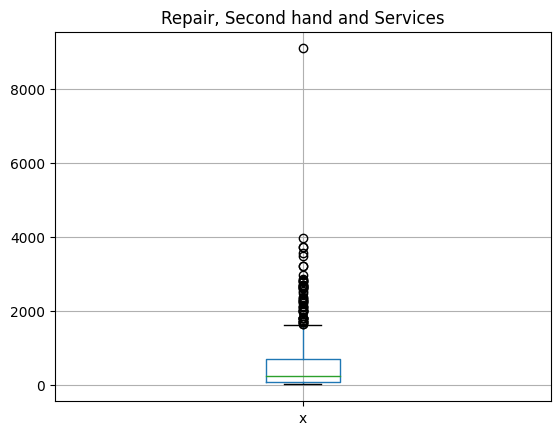

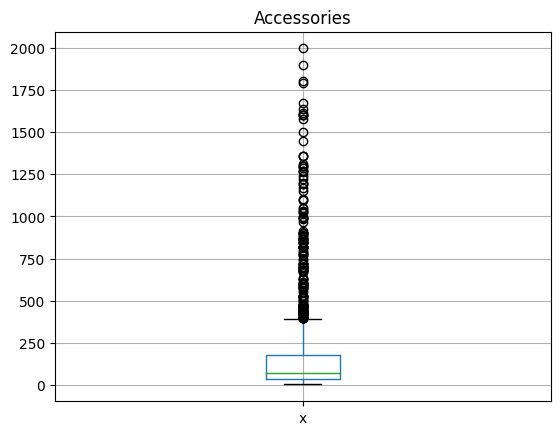

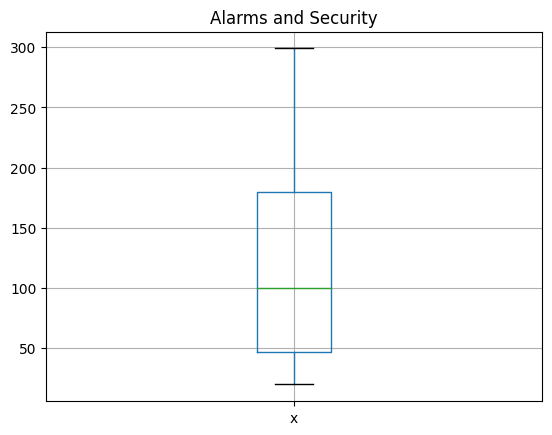

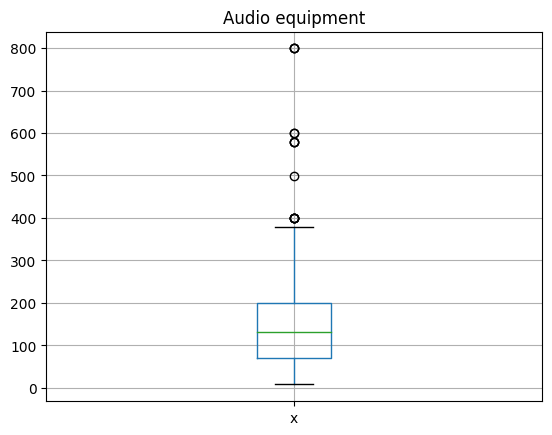

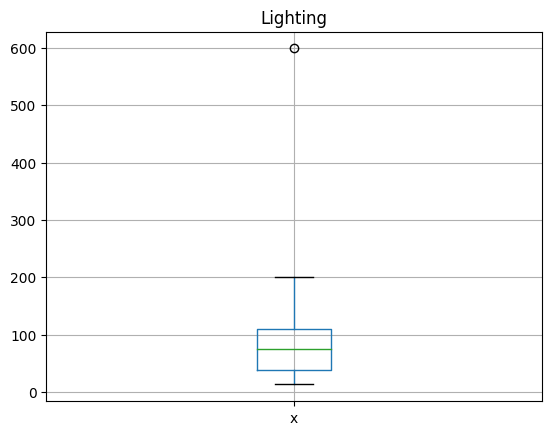

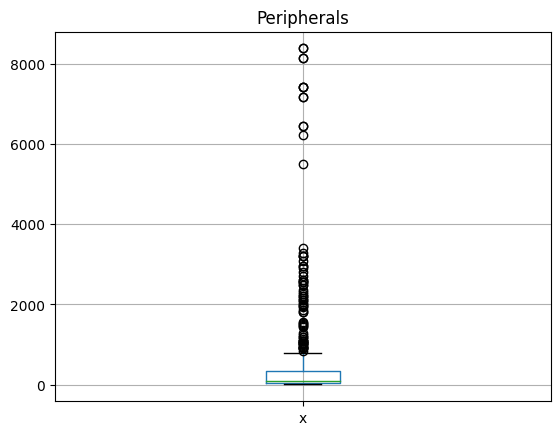

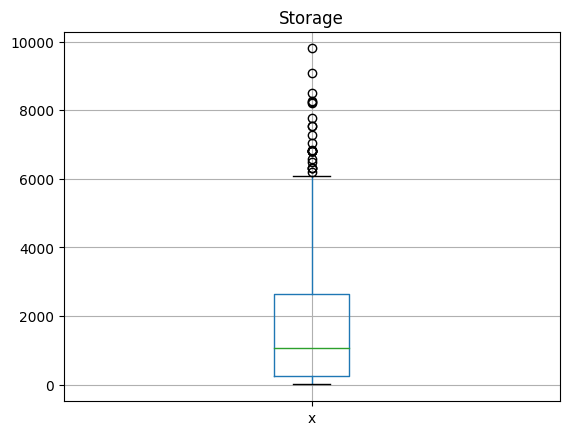

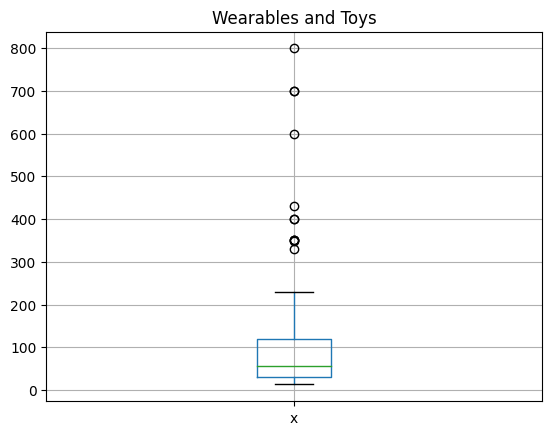

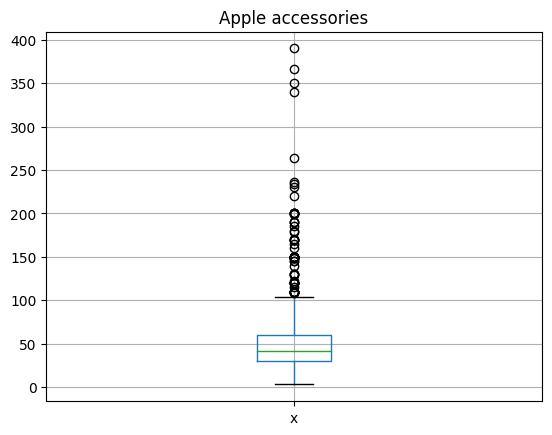

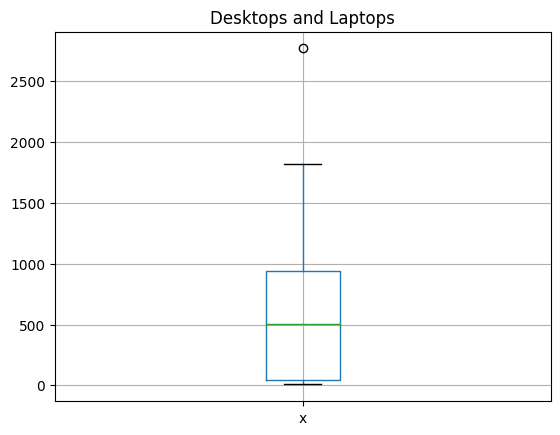

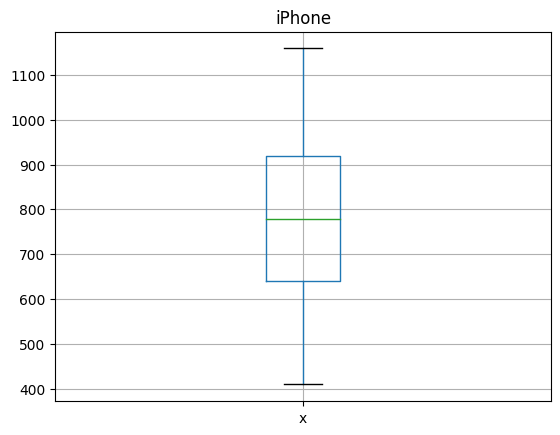

In [ ]:
def get_category_stats(dataframe, categories, alpha=0.25):
    outliers = dict()
    percentages = dict()
    for category in categories:
        data  = products.loc[products['category'] == category, 'price']
        # Q1
        q_low = data.quantile(alpha)
        # Q3
        q_hi  = data.quantile(1-alpha)
        # IQR
        iqr = q_hi - q_low
        cut_min = q_low - 1.5*iqr
        cut_max = q_hi + 1.5*iqr

        plt.figure()
        _, bp = pd.DataFrame.boxplot(data, return_type='both')
        plt.title(category)

        current = data.loc[(data < cut_min) | (data > cut_max)].index
        outliers[category] = current
        percentages[category] = 100*len(outliers)/data.shape[0]

    return outliers, percentages


outliers, percentages = get_category_stats(products, categories, 0.25)

# print(outliers)
for cat in categories:
    # print(products.iloc[outliers[cat]])
    print(f'{cat} - {percentages[cat]:.2f} %')

In [ ]:
# print(products[products['category'].str.contains('Light')].nlargest(10, 'price'))
# print(products[products['category'].str.contains('Wear')].nlargest(10, 'price'))
print(products[products['category'].str.contains('Alarm')].nlargest(10, 'price'))

      Unnamed: 0      sku  \
6015       19087  RIN0015   
6016       19088  RIN0016   
2245         456  DLK0029   
6718       17847  SYN0183   
6357         530  SNN0019   
4150       11794  MYF0012   
3034        2953  IHE0012   
4148        2660  MYF0008   
4162        3095  NEA0014   
6345       17165  SMR0007   

                                                                 name  \
6015       Video surveillance camera Floodlight Ring with Black Spots   
6016  Video surveillance camera Floodlight Ring with White Spotlights   
2245                             D-Link DCS-5222L surveillance camera   
6718                                  Synology NVR1218 Video Recorder   
6357                        Sonnet RackMac support rack mini Mac mini   
4150             MyFox Intellitag® intelligent sensors for Home Alarm   
3034                             iHealth Ismart Alarm Security System   
4148             MyFox Security Camera for Home Security Alarm System   
4162                   

In [ ]:
print(products['category'].value_counts())
print(f'sum of all categorized products: {products["category"].value_counts().sum()}')
print(f'sum of all products: {products.shape[0]}')
print()

Storage                             1903
Accessories                         1761
Apple accessories                   1374
Repair, Second hand and Services     845
Peripherals                          589
Desktops and Laptops                 261
Audio equipment                      231
Missing                              181
Wearables and Toys                   148
iPhone                                97
Alarms and Security                   59
Lighting                              28
Name: category, dtype: int64
sum of all categorized products: 7477
sum of all products: 7477



## 2. What is the distribution of product prices across different categories?

In [ ]:
or_ol_pro_merged = ord_ordlin_merged.merge(products, how='inner', on='sku')

In [ ]:
or_ol_pro_merged=or_ol_pro_merged.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','name','desc','Unnamed: 0','in_stock','id', 'state'])

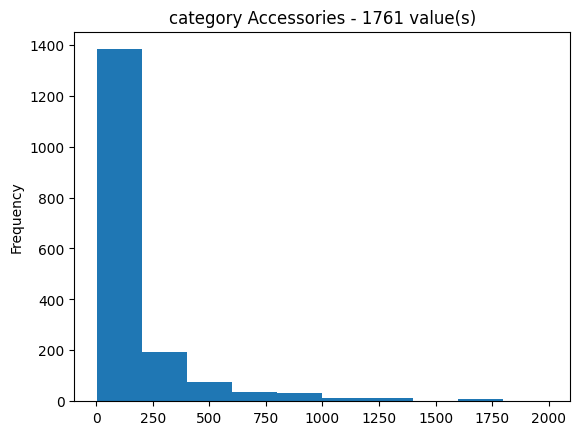

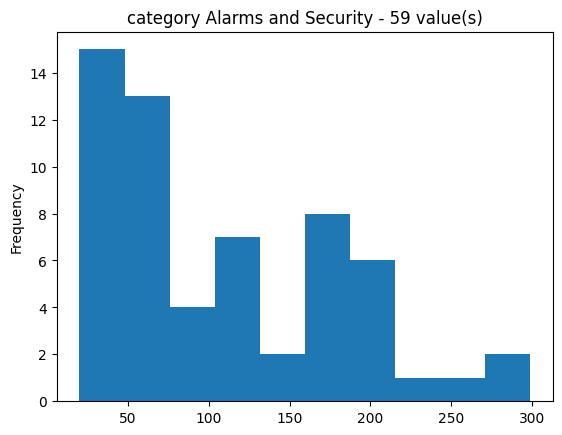

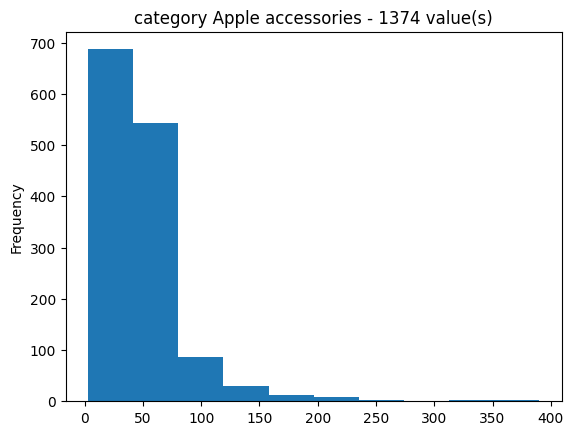

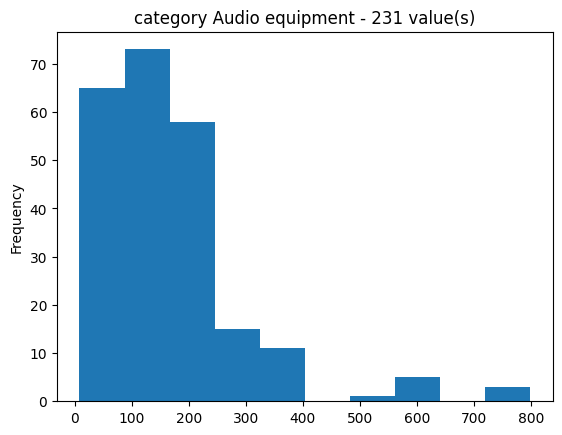

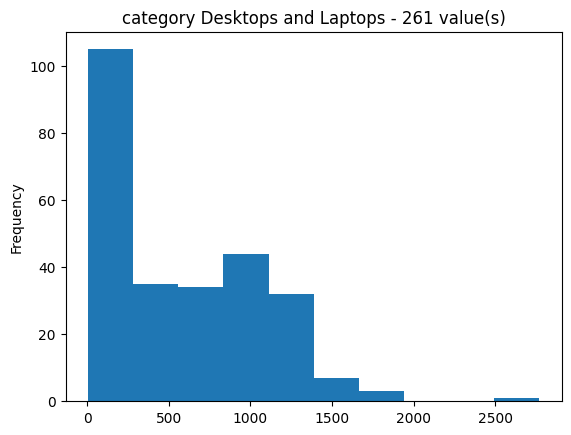

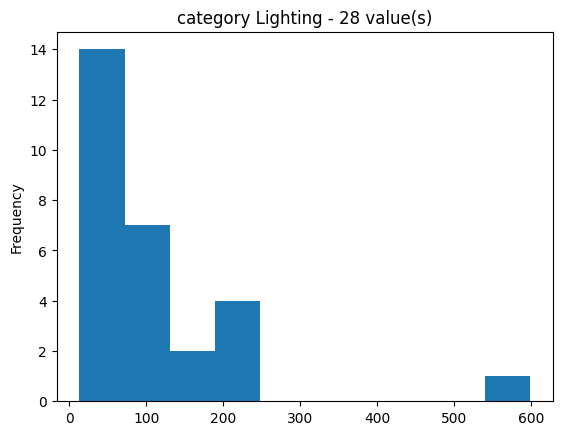

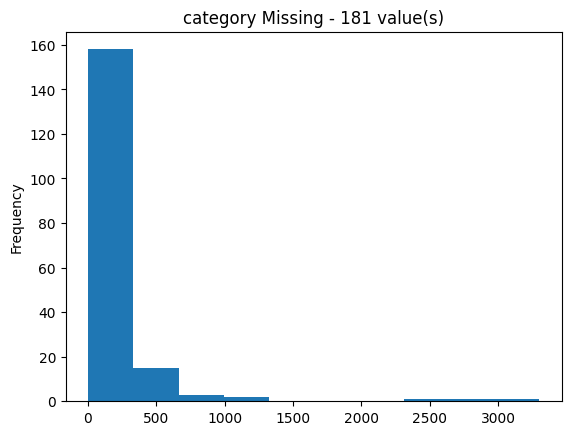

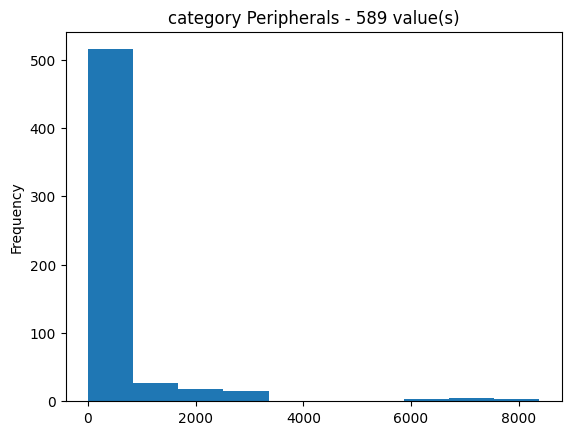

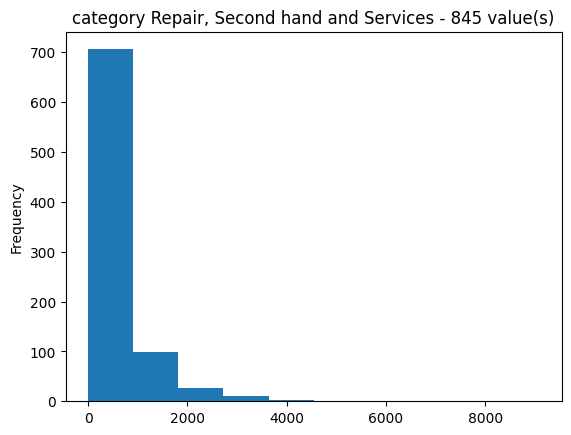

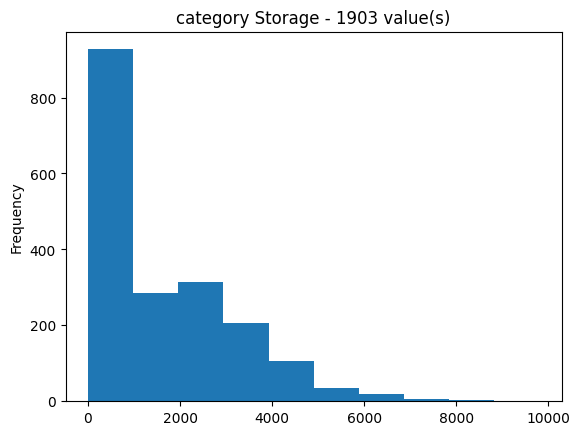

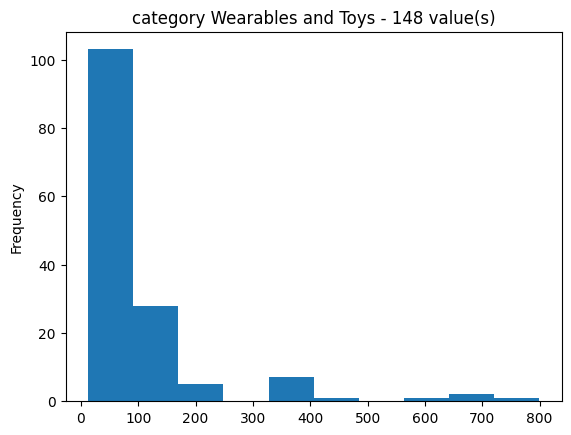

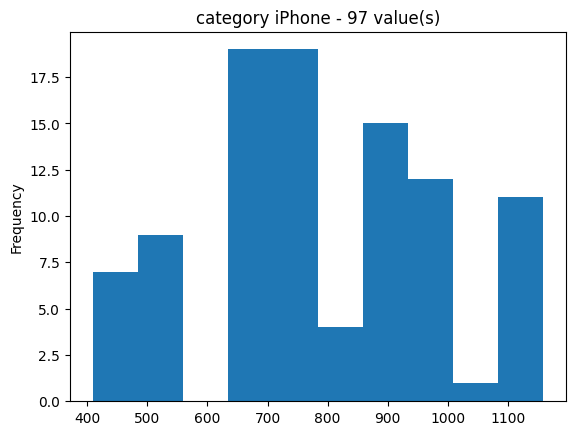

In [ ]:
categories = sorted(products.loc[:, 'category'].unique())

# plot a histogram for each type
for index, cat in enumerate(categories):
    data = products.loc[products.loc[:, 'category'] == cat, 'price'].reset_index()['price']
    data.plot(
        kind='hist',
        title=f'category {cat} - {data.shape[0]} value(s)',
        bins=10
    )
    plt.show()

## 3. How many products are being discounted?

In [ ]:
# Hristo

orderlines_products = pd.merge(orderlines, products, how='inner', on='sku')
orderlines_products_orders = pd.merge(orderlines_products, orders, how='inner', on=['order_id'])
discounted = orderlines_products_orders.loc[orderlines_products_orders.loc[:, 'price'] > orderlines_products_orders.loc[:, 'unit_price'], ['sku', 'unit_price', 'price']]
percent    = 100*discounted["sku"].count()/orderlines_products_orders.shape[0]
discounted['disc_pct'] = 100 * (discounted['price'] - discounted['unit_price'])/discounted['price']
print(f'{discounted["sku"].count()} products or {percent:.2f} %')

56255 products or 93.11 %


In [ ]:
or_ol_pro_merged['disc_pct'] = 100 * (or_ol_pro_merged['price'] - or_ol_pro_merged['unit_price'])/or_ol_pro_merged['price']

In [ ]:
or_ol_pro_merged

,order_id,created_date,total_paid,product_quantity,sku,unit_price,date,price,type,category,match,disc_pct
0,241423,2017-11-06 13:10:02,136.15,1,LAC0212,129.16,2017-11-06 12:47:20,139.99,11935397,Accessories,USB,7.736267
1,269440,2017-01-18 19:15:00,213.98,1,LAC0212,136.99,2017-01-18 19:12:49,139.99,11935397,Accessories,USB,2.143010
2,304328,2017-01-07 17:27:26,177.97,1,LAC0212,136.99,2017-01-07 17:13:59,139.99,11935397,Accessories,USB,2.143010
3,305628,2017-01-09 12:30:07,140.98,1,LAC0212,136.99,2017-01-09 12:22:46,139.99,11935397,Accessories,USB,2.143010
4,306550,2017-01-10 15:28:00,143.98,1,LAC0212,136.99,2017-01-10 15:23:11,139.99,11935397,Accessories,USB,2.143010
...,...,...,...,...,...,...,...,...,...,...,...,...
60415,526066,2018-03-13 20:12:28,87.98,1,WAC0254,83.99,2018-03-12 17:45:42,99.00,1405,Accessories,tablet,15.161616
60416,526093,2018-03-12 18:38:36,90.98,1,WAC0252,83.99,2018-03-12 18:32:29,99.00,1405,Accessories,tablet,15.161616
60417,526212,2018-03-12 23:43:35,1266.60,1,APP2067-A,1181.33,2018-03-12 23:28:51,1355.59,-2043332096,"Repair, Second hand and Services",Reconditioned,12.854919
60418,526440,2018-03-13 15:17:54,885.17,1,PAC2235,878.18,2018-03-13 15:08:27,1124.98,12175397,Storage,NAS,21.938168


In [ ]:
#sns.catplot(data=or_ol_pro_merged,
#             x='disc_pct',
#            y='price',
#             hue='category',
#             height=7,
#             );

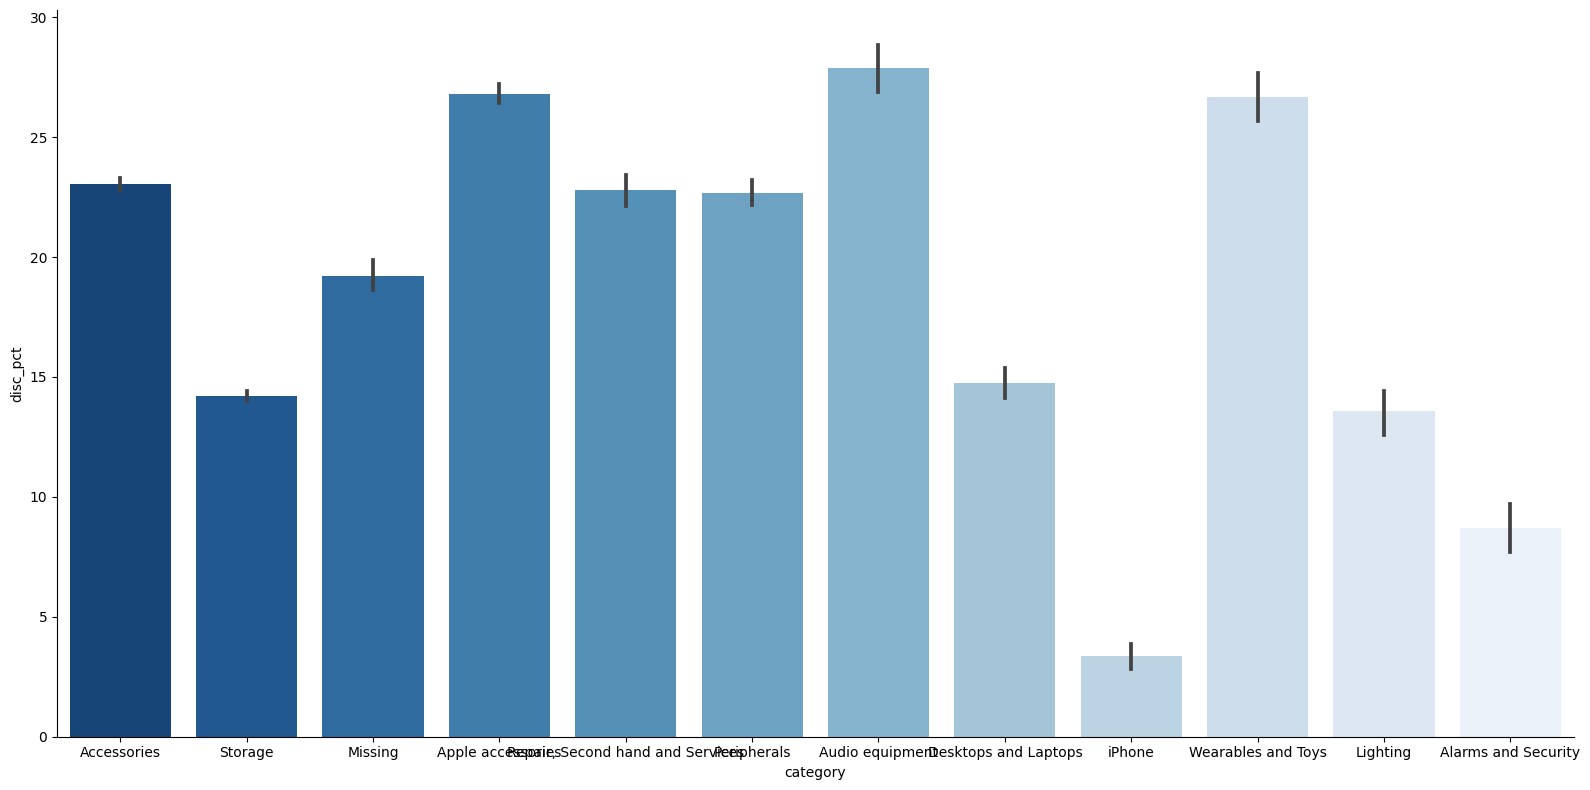

In [ ]:
# Percentage of discount per category
p = (sns.catplot(kind='bar',
            data=or_ol_pro_merged,
            x='category',
            y='disc_pct',
            height=8,
            aspect=2,
            palette="Blues_r",
            legend=False)
)
#p.figure.suptitle(title='Percentage of discount per product´s categories')
#p.label(x='Category', y='Discount')

## 4. How big are the offered discounts as a percentage of the product prices?

In [ ]:
discount_percentage = 100 * ((discounted.loc[:, 'price'] - discounted.loc[:, 'unit_price'])/discounted.loc[:,'price'])
discount_percentage.nlargest(100)

31298    99.979996
35123    99.949975
13912    99.932241
583      99.930962
43719    99.928611
           ...    
37653    90.821705
33888    89.586198
6102     88.893830
6121     88.893830
6125     88.893830
Length: 100, dtype: float64

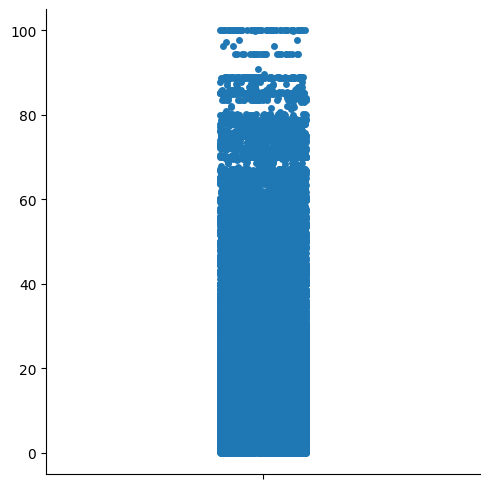

In [ ]:
sns.catplot(data=discount_percentage, 
           
            );

## 5. How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [ ]:
orders["created_date"] = pd.to_datetime(orders["created_date"])

min - 2017-03-04,
max - 2017-11-24


<Axes: xlabel='created_date'>

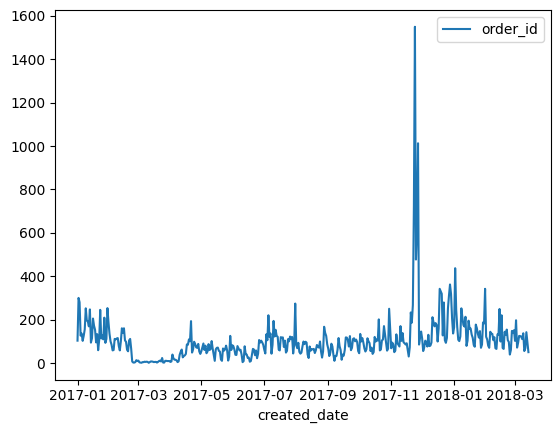

In [ ]:
orders_no_hours                 = orders.copy()
orders_no_hours['created_date'] = orders_no_hours['created_date'].dt.date

# filter for Completed orders
orders_no_hours = orders_no_hours.loc[orders_no_hours.loc[:, 'state'] == 'Completed']

grouped_by_months = orders_no_hours.groupby('created_date').agg({'order_id': 'count'})
print(f'min - {grouped_by_months.idxmin()[0]},\nmax - {grouped_by_months.idxmax()[0]}')
grouped_by_months.plot(kind='line', y='order_id')

# orders.resample('W', on='created_date').count()['order_id'].plot()

## 6. How could data collection be improved?

## 7. How many orders are there?

In [ ]:
print(orders.loc[:, 'order_id'].nunique())

45608


## 8. How many products are there?

In [ ]:
print(products.loc[:, 'sku'].nunique())

7477


## 9. What period of time do these orders comprise?

In [ ]:
min_date = orders.loc[:, 'created_date'].min()
max_date = orders.loc[:, 'created_date'].max()
date_diff = max_date - min_date
print(f'{date_diff.days} days')

437 days


## 10. How many orders are Completed?

In [ ]:
print(orders.loc[orders.loc[:, 'state'] == 'Completed', :]['order_id'].count())

45608


## 11. How should revenue be computed?

In [ ]:
or_ol_pro_merged['unit_price_total'] = or_ol_pro_merged['product_quantity'] * or_ol_pro_merged['unit_price']

In [ ]:
or_ol_pro_merged

,order_id,created_date,total_paid,product_quantity,sku,unit_price,date,price,type,category,match,disc_pct,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,1,LAC0212,129.16,2017-11-06 12:47:20,139.99,11935397,Accessories,USB,7.736267,129.16
1,269440,2017-01-18 19:15:00,213.98,1,LAC0212,136.99,2017-01-18 19:12:49,139.99,11935397,Accessories,USB,2.143010,136.99
2,304328,2017-01-07 17:27:26,177.97,1,LAC0212,136.99,2017-01-07 17:13:59,139.99,11935397,Accessories,USB,2.143010,136.99
3,305628,2017-01-09 12:30:07,140.98,1,LAC0212,136.99,2017-01-09 12:22:46,139.99,11935397,Accessories,USB,2.143010,136.99
4,306550,2017-01-10 15:28:00,143.98,1,LAC0212,136.99,2017-01-10 15:23:11,139.99,11935397,Accessories,USB,2.143010,136.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60415,526066,2018-03-13 20:12:28,87.98,1,WAC0254,83.99,2018-03-12 17:45:42,99.00,1405,Accessories,tablet,15.161616,83.99
60416,526093,2018-03-12 18:38:36,90.98,1,WAC0252,83.99,2018-03-12 18:32:29,99.00,1405,Accessories,tablet,15.161616,83.99
60417,526212,2018-03-12 23:43:35,1266.60,1,APP2067-A,1181.33,2018-03-12 23:28:51,1355.59,-2043332096,"Repair, Second hand and Services",Reconditioned,12.854919,1181.33
60418,526440,2018-03-13 15:17:54,885.17,1,PAC2235,878.18,2018-03-13 15:08:27,1124.98,12175397,Storage,NAS,21.938168,878.18


In [ ]:
grouped_for_revenue = or_ol_pro_merged.groupby(['order_id']).sum().sort_values(by='unit_price_total', ascending = False)

In [ ]:
grouped_for_revenue.agg({'unit_price_total' : 'sum'})

unit_price_total    15155500.62
dtype: float64

# Analysis

In [ ]:
# Change Dtype object to date

or_ol_pro_merged['date'] = pd.to_datetime(or_ol_pro_merged['date'])
or_ol_pro_merged['created_date'] = pd.to_datetime(or_ol_pro_merged['created_date'])

In [ ]:
# Revenue per month

In [ ]:
revenue_by_date = or_ol_pro_merged.resample('M', on='created_date').agg({'unit_price_total': 'sum'})

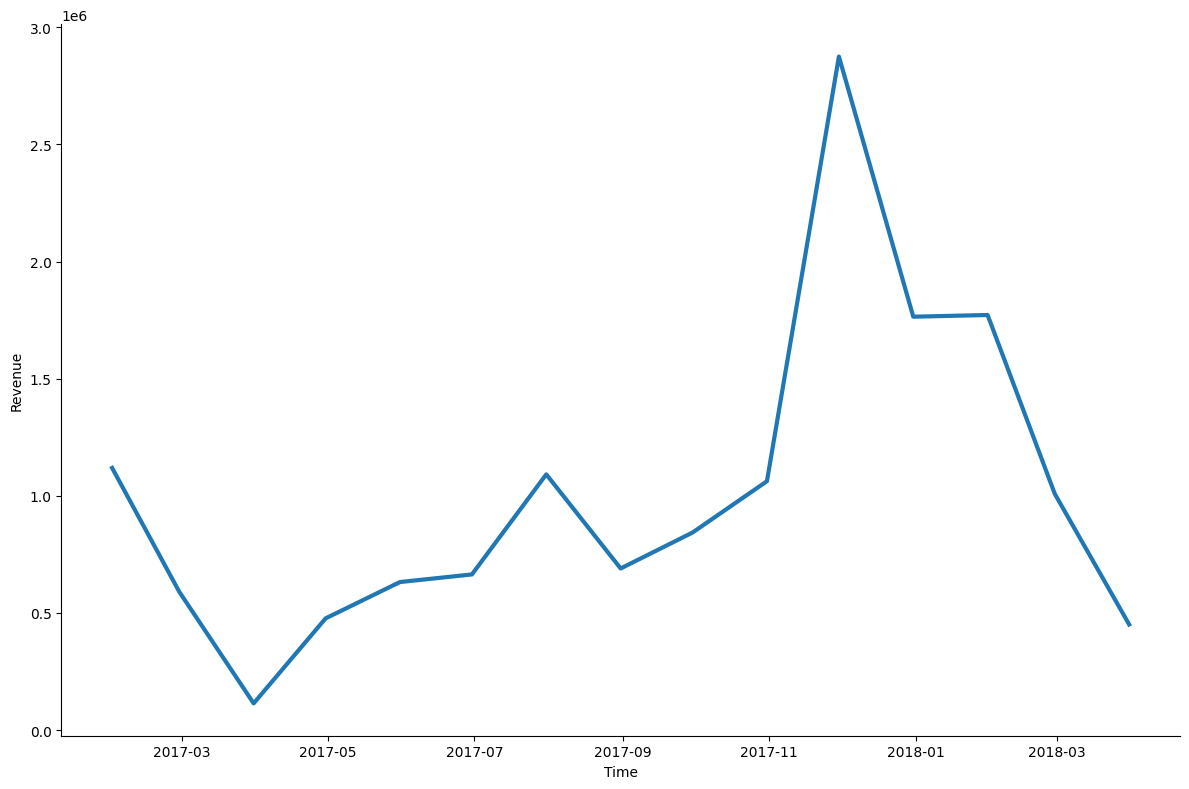

In [ ]:
sns.relplot(data=revenue_by_date, x='created_date', y='unit_price_total', kind='line', height=8, aspect=1.5, linewidth=3, palette='vlag').set_axis_labels('Time', 'Revenue').tight_layout(w_pad=0)

In [ ]:
#  Revenue per month and category 

In [ ]:
revenue_by_date_cat = or_ol_pro_merged.copy()

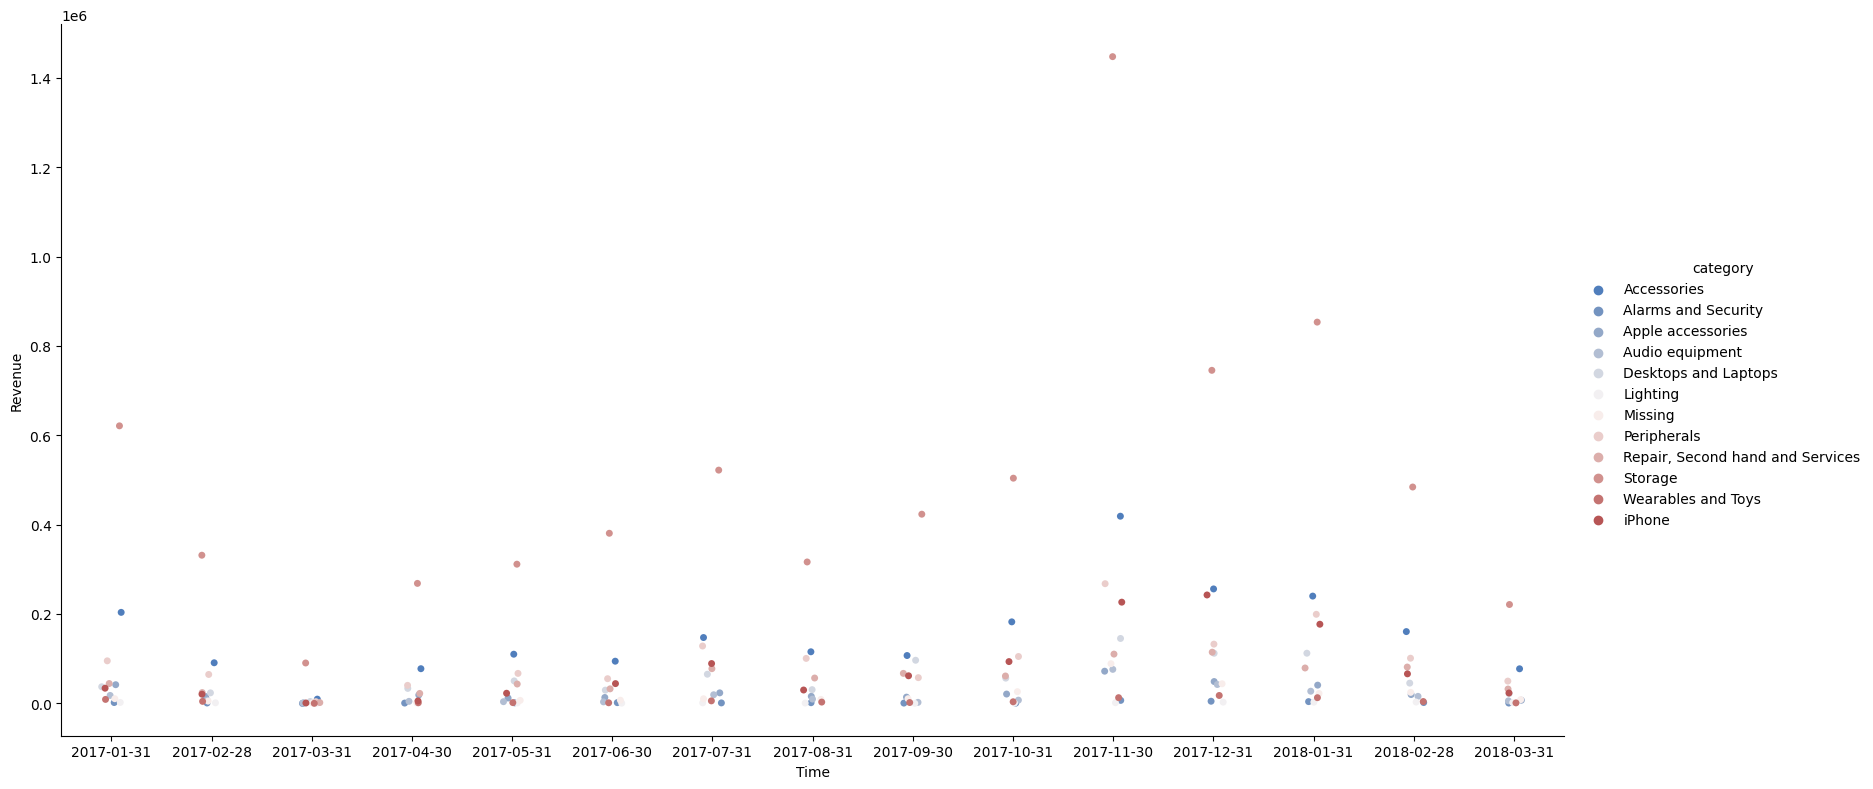

In [ ]:
revenue_by_date_cat = revenue_by_date_cat.groupby(['category']).resample('M', on='created_date').agg({'unit_price_total': 'sum'})
sns.catplot(
             data=revenue_by_date_cat,
             x='created_date',
             y='unit_price_total',
             hue='category',
             height=8,
             aspect=2, palette='vlag').set_axis_labels('Time', 'Revenue');

In [ ]:
sns.catplot(
            data=revenue_by_date_cat,
            x='created_date',
            y='unit_price_total',
            hue='category',
            height=8,
            aspect=2);

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f49d03e4700> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f49d0456940> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
revenue_by_date_cat.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 180 entries, ('Accessories', Timestamp('2017-01-31 00:00:00', freq='M')) to ('iPhone', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unit_price_total  180 non-null    float64
dtypes: float64(1)
memory usage: 2.9+ KB


In [ ]:
# Discount´s average per month and category 

In [ ]:
# Number of Sold per month

In [ ]:
number_orders_month = orders.resample('M', on='created_date').agg({'order_id': 'count'})

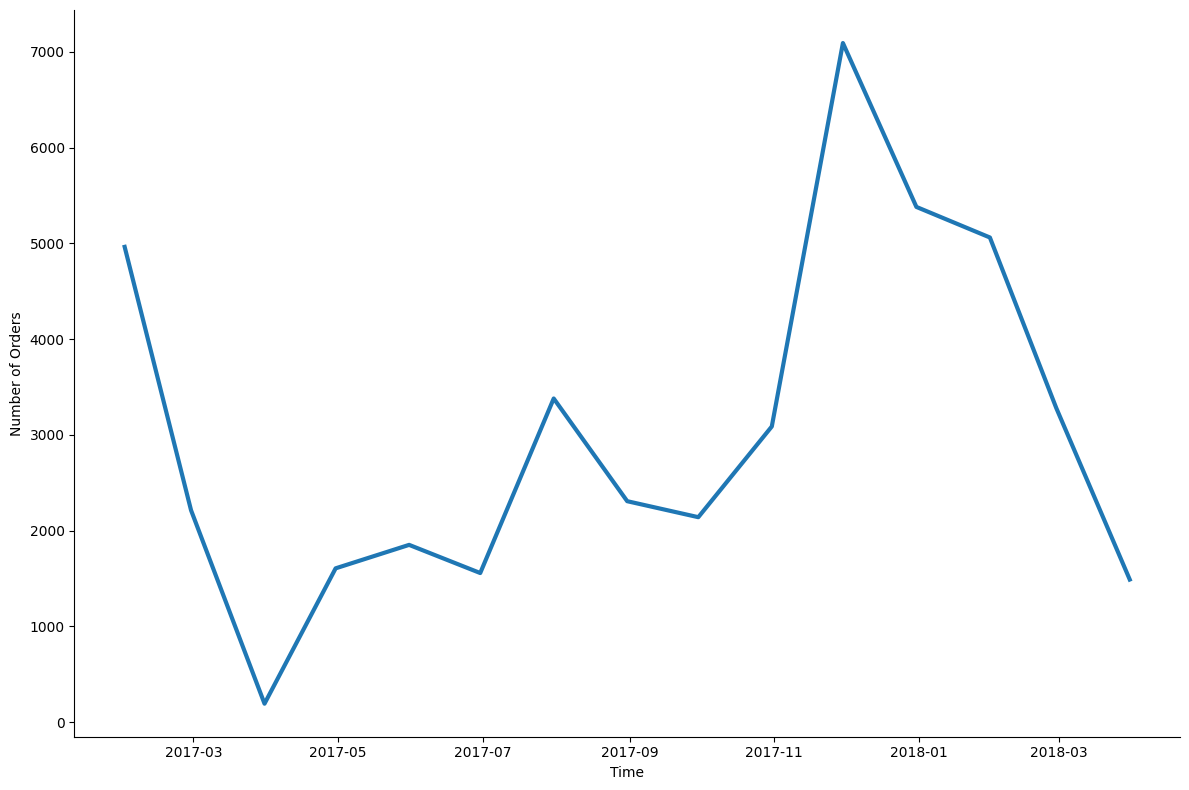

In [ ]:
sns.relplot(data=number_orders_month, x='created_date', y='order_id', kind='line', height=8, aspect=1.5, linewidth=3, palette='vlag').set_axis_labels('Time', 'Number of Orders').tight_layout(w_pad=0)

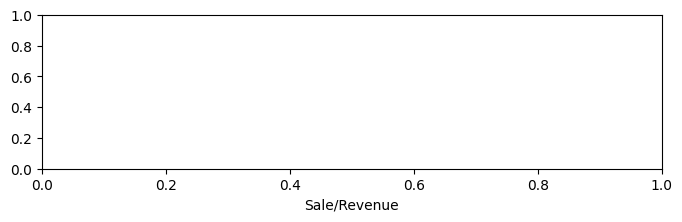

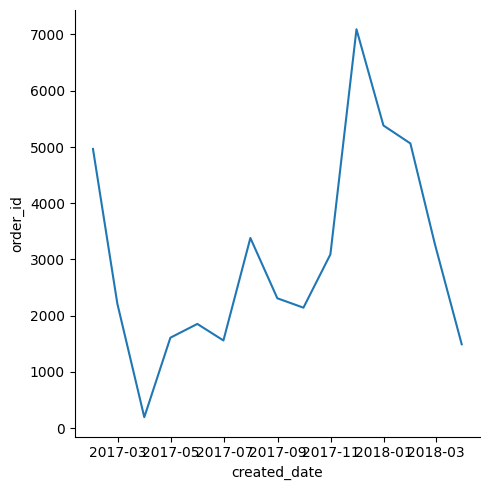

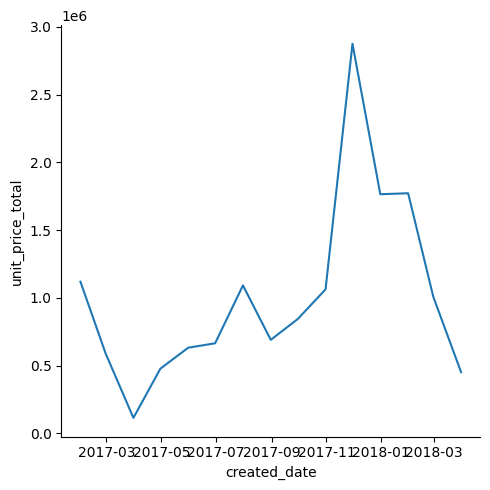

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2), sharey=True)
sns.relplot(data=number_orders_month,  x='created_date', y='order_id', kind='line', 
               ax=ax)
sns.relplot(data=revenue_by_date, x='created_date', y='unit_price_total', kind='line',
               ax=ax)
ax.set_xlabel('Sale/Revenue')
plt.show()

AttributeError: ignored

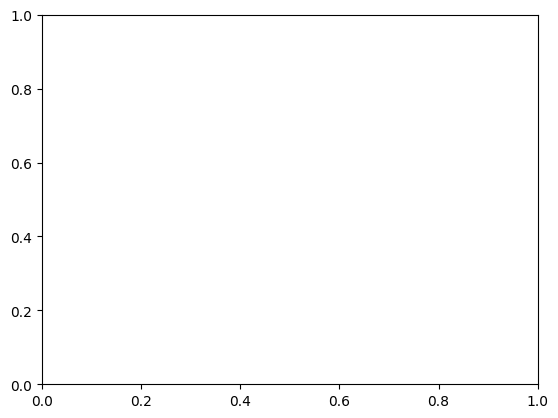

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

number_orders_month = orders.resample('M', on='created_date').agg({'order_id': 'count'})
ax.bar(number_orders_month.created_date, number_orders_month.order_id, color="blue")
ax.set_ylabel("Number of Orders")

# # ax2 = ax.twinx()
# # ax2.plot(revenue_by_date["created_date"], revenue_by_date["unit_price_total"], color="red")
# # ax2.set_ylabel("Revenue")

# #sns.relplot(data=number_orders_month, x='created_date', y='order_id', kind='line', height=8, aspect=1.5, linewidth=3, palette='vlag').set_axis_labels('Time', 'Number of Orders').tight_layout(w_pad=0)
# #sns.relplot(data=revenue_by_date, x='created_date', y='unit_price_total', kind='line', height=8, aspect=1.5, linewidth=3, palette='vlag').set_axis_labels('Time', 'Revenue').tight_layout(w_pad=0)

plt.show()

In [ ]:
number_orders_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2017-01-31 to 2018-03-31
Freq: M
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   order_id  15 non-null     int64
dtypes: int64(1)
memory usage: 796.0 bytes


In [ ]:
revenue_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2017-01-31 to 2018-03-31
Freq: M
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unit_price_total  15 non-null     float64
dtypes: float64(1)
memory usage: 796.0 bytes


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# iphone_grouped = grouped4[grouped4["broad_category"] == "iPhone"]

# fig, ax = plt.subplots()

# ax.bar(iphone_grouped["year_month"], iphone_grouped["value"], color="blue")
# ax.set_ylabel("Value")

# ax2 = ax.twinx()
# ax2.plot(iphone_grouped["year_month"], iphone_grouped["discount"], color="red")
# ax2.set_ylabel("Discount")

# plt.show()

In [ ]:
# Set the x-axis tick label rotation and spacing
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7477 entries, 0 to 7476
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7477 non-null   int64  
 1   sku         7477 non-null   object 
 2   name        7477 non-null   object 
 3   desc        7477 non-null   object 
 4   price       7477 non-null   float64
 5   in_stock    7477 non-null   int64  
 6   type        7477 non-null   int64  
 7   category    7477 non-null   object 
 8   match       7296 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 525.9+ KB
